# Monomial interpolation

In [7]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as pt

In [8]:
x = np.linspace(0, 1, 200)

Now plot the monomial basis on the interval [0,1] up to $x^9$.

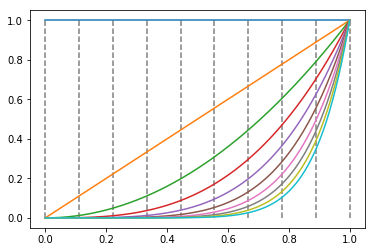

In [9]:
n = 10

for i in range(n):
    pt.plot(x, x**i)
    
pt.vlines(np.linspace(0, 1, n), 0, 1, alpha=0.5, linestyle="--")

* How do the entries of the Vandermonde matrix relate to this plot?

------------------
* Guess the condition number of the Vandermonde matrix for $n=5,10,20$:

In [14]:
n = 5

x = np.linspace(0, 1, n)

V = np.zeros((n, n))
for i in range(n):
    V[:, i] = x**i

la.cond(V)

686.43494181859182

## Practical Impact

Is there really a practical impact to this? Let's find out by plotting the error in an interpolant:

In [198]:
n = 20

def f(x):
    return np.sin(2*np.pi*x)

In [199]:
x = np.linspace(0, 1, n)

V = np.zeros((n, n))
for i in range(n):
    V[:, i] = x**i

coeffs = la.solve(V, f(x))

In [200]:
many_x = np.linspace(0, 1, 5000)
interp = 0
for i in range(n):
    interp += coeffs[i]*many_x**i    

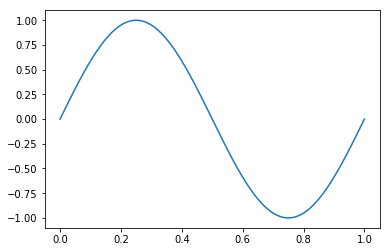

In [201]:
pt.plot(many_x, f(many_x))

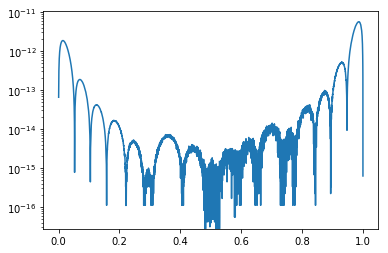

In [202]:
pt.semilogy(many_x, np.abs(interp - f(many_x)))

Observations?

In [203]:
# Those fuzzy bits down there are the floating point error.
# In practice, results can be *much* better than condition number suggests--even "most of the time".
# Condition number bounds are *worst-case*.